In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from pandas import DataFrame, read_csv
from os import listdir
import seaborn as sns
import pandas as pd


In [3]:
import random
def get_color(obj_dict):
    
    color = ''
    
    while color not in obj_dict.values() and color == '':
        
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    return color

In [4]:
otutab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/LACTO_CASE/Pike_res/merged_otu_table.tsv', sep='\t', index_col=0)
taxtab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/LACTO_CASE/Pike_res/TAXONOMY/tax_table.tsv', sep='\t', index_col=0)

In [5]:
metadata = {samp : {} for samp in otutab.index}
otu_count = 0

for i in otutab.columns:
    try:
        
        taxon = ' '.join(taxtab['Species'][i].split(' ')[:2])
        taxon = f'OTU{otu_count}_{taxon}' 
        otu_count += 1
        #taxon = taxtab['Species'][i]

        taxon = taxtab['Genus'][i]

    except:continue
    
    for samp in otutab.index:
            
        if taxon not in metadata[samp].keys():
            
            metadata[samp][taxon] = 0
        
        metadata[samp][taxon] += otutab[i][samp]
        
metadata = DataFrame(metadata)    

In [6]:
metadata = (metadata/metadata.sum(axis=0))#.sum(axis=0)
metadata = metadata.assign(m=metadata.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(metadata.columns)]

In [7]:
full_data = []

for samp in listdir('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/NANOPORE_PROJECT/wf-meta/LACTO/kraken'):
    
    opn_tab = read_csv(f'/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/NANOPORE_PROJECT/wf-meta/LACTO/kraken/{samp}/abundance_table_species.tsv', sep='\t', index_col=0)
    
    full_data.append(opn_tab[samp])
full_data = pd.concat(full_data, axis=1).fillna(0)  
full_data = full_data[np.sort(full_data.columns)]
full_data_wf_meta = {}

for i in full_data.index:
    
    tax = i.split(';')[-2]

    for samp in full_data.columns:
        if samp not in full_data_wf_meta.keys():
            
            full_data_wf_meta[samp] = {}
        
        if tax not in full_data_wf_meta[samp].keys():
            
            full_data_wf_meta[samp][tax] = 0
        
        full_data_wf_meta[samp][tax] += full_data[samp][i]

full_data_wf_meta = DataFrame(full_data_wf_meta)
full_data_wf_meta = full_data_wf_meta/full_data_wf_meta.sum(axis=0)
full_data_wf_meta_kraken = full_data_wf_meta.assign(m=full_data_wf_meta.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(full_data_wf_meta.columns)]

In [8]:
full_data = []

for samp in listdir('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/NANOPORE_PROJECT/wf-meta/LACTO/minimap/'):
    
    opn_tab = read_csv(f'/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/NANOPORE_PROJECT/wf-meta/LACTO/minimap/{samp}/abundance_table_species.tsv', sep='\t', index_col=0)
    
    full_data.append(opn_tab[samp])
full_data = pd.concat(full_data, axis=1).fillna(0)  
full_data = full_data[np.sort(full_data.columns)]
full_data_wf_meta = {}

for i in full_data.index:
    
    tax = i.split(';')[-2]

    for samp in full_data.columns:
        if samp not in full_data_wf_meta.keys():
            
            full_data_wf_meta[samp] = {}
        
        if tax not in full_data_wf_meta[samp].keys():
            
            full_data_wf_meta[samp][tax] = 0
        
        full_data_wf_meta[samp][tax] += full_data[samp][i]

full_data_wf_meta = DataFrame(full_data_wf_meta)
full_data_wf_meta = full_data_wf_meta/full_data_wf_meta.sum(axis=0)
full_data_wf_meta_minimap = full_data_wf_meta.assign(m=full_data_wf_meta.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(full_data_wf_meta.columns)]

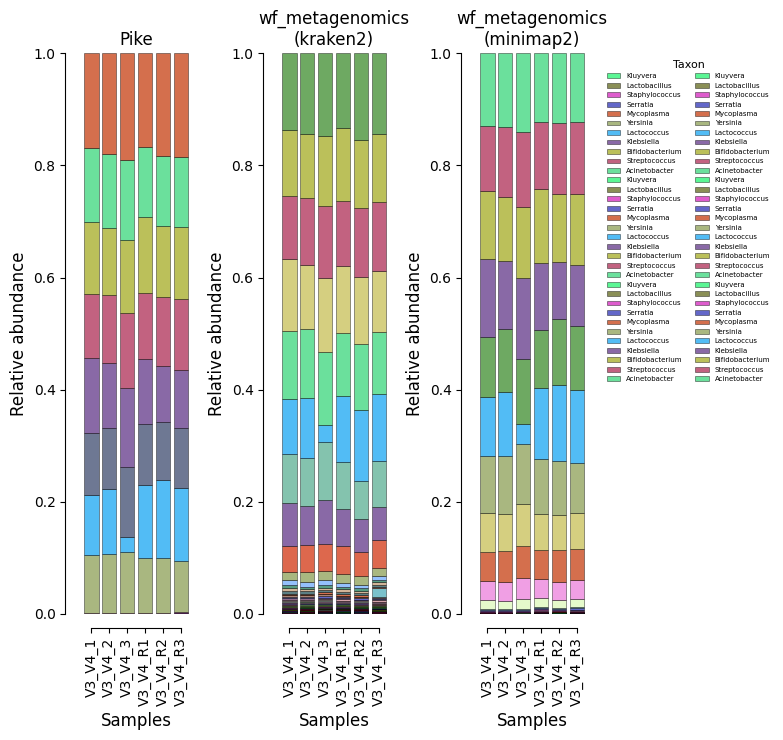

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(8, 7.5))
data_tax_df = metadata

Color_collection = {}      
all_coords = []
width = 0.8
sample_coord = 0 
c = []
fst = True

for i in data_tax_df.index:
    
    Color_collection[i] = get_color(Color_collection)
    
for sample in data_tax_df.columns:
    
    bottom = 0
    all_coords.append(sample_coord)
    
    for otu in data_tax_df.index:

        axs[0].bar(sample_coord, 
                      data_tax_df[sample][otu], 
                      width, 
                      bottom=bottom,
                      edgecolor='black',
                      alpha=.7,
                      linewidth=0.4, 
                      color=Color_collection[otu])
            
        bottom += data_tax_df[sample][otu]
    fst = False
    sample_coord += 1
axs[0].set_ylim(0, 1.0)
#axs[0].legend(fontsize=5, bbox_to_anchor=(1, 1), title='Taxon', title_fontsize=8, frameon=False)
axs[0].set_xticks(all_coords, data_tax_df.columns, fontsize=5)
axs[0].set_ylabel('Relative abundance', fontsize=12)
axs[0].set_xlabel('Samples', fontsize=12)
axs[0].set_title('Pike', fontsize=12)
sns.despine(offset=10, trim=True, ax=axs[0])
axs[0].set_xticklabels(data_tax_df.columns, rotation=90)

data_tax_df = full_data_wf_meta_kraken

all_coords = []
width = 0.8
sample_coord = 0 
c = []
fst = True

for i in data_tax_df.index:
    if i in Color_collection: continue
    
    Color_collection[i] = get_color(Color_collection)

drops = []

for i in Color_collection.copy().keys():
    
    if i not in full_data_wf_meta_kraken.index:

        drops.append(i)
        
for i in drops:
    
    Color_collection.pop(i)

for sample in data_tax_df.columns:
    
    bottom = 0
    all_coords.append(sample_coord)
    
    for otu in data_tax_df.index:
        if otu in metadata.index:
            axs[1].bar(sample_coord, 
                          data_tax_df[sample][otu], 
                          width, 
                          label=otu, 
                          bottom=bottom,
                          edgecolor='black',
                          linewidth=0.4, 
                          alpha=.7,
                          color=Color_collection[otu])
        else:
            axs[1].bar(sample_coord, 
                          data_tax_df[sample][otu], 
                          width, 
                          bottom=bottom,
                          edgecolor='black',
                          alpha=.7,
                          linewidth=0.4, 
                          color=Color_collection[otu])
            
        bottom += data_tax_df[sample][otu]
    fst = False
    sample_coord += 1
axs[1].set_ylim(0, 1.0)
#axs[1].legend(fontsize=5, bbox_to_anchor=(1, 1.05), title='Taxon', ncols=1, title_fontsize=8, frameon=False)
axs[1].set_xticks(all_coords, data_tax_df.columns, fontsize=5)
axs[1].set_ylabel('Relative abundance', fontsize=12)
axs[1].set_xlabel('Samples', fontsize=12)
axs[1].set_title('wf_metagenomics\n(kraken2)', fontsize=12)
sns.despine(offset=10, trim=True, ax=axs[1])
axs[1].set_xticklabels(data_tax_df.columns, rotation=90)

data_tax_df = full_data_wf_meta_minimap

all_coords = []
width = 0.8
sample_coord = 0 
c = []
fst = True

for i in data_tax_df.index:
    if i in Color_collection: continue
    
    Color_collection[i] = get_color(Color_collection)

drops = []

for i in Color_collection.copy().keys():
    
    if i not in full_data_wf_meta_minimap.index:

        drops.append(i)
        
for i in drops:
    
    Color_collection.pop(i)

for sample in data_tax_df.columns:
    
    bottom = 0
    all_coords.append(sample_coord)
    
    for otu in data_tax_df.index:
        if otu in metadata.index:
            axs[2].bar(sample_coord, 
                          data_tax_df[sample][otu], 
                          width, 
                          label=otu, 
                          bottom=bottom,
                          edgecolor='black',
                          linewidth=0.4, 
                          alpha=.7,
                          color=Color_collection[otu])
        else:
            axs[2].bar(sample_coord, 
                          data_tax_df[sample][otu], 
                          width, 
                          bottom=bottom,
                          edgecolor='black',
                          alpha=.7,
                          linewidth=0.4, 
                          color=Color_collection[otu])
            
        bottom += data_tax_df[sample][otu]
    fst = False
    sample_coord += 1
axs[2].set_ylim(0, 1.0)
axs[2].legend(fontsize=5, bbox_to_anchor=(1.1, 1.0), title='Taxon', ncols=2, title_fontsize=8, frameon=False)
axs[2].set_xticks(all_coords, data_tax_df.columns, fontsize=5)
axs[2].set_ylabel('Relative abundance', fontsize=12)
axs[2].set_xlabel('Samples', fontsize=12)
axs[2].set_title('wf_metagenomics\n(minimap2)', fontsize=12)
sns.despine(offset=10, trim=True, ax=axs[2])
axs[2].set_xticklabels(data_tax_df.columns, rotation=90)

plt.tight_layout()
plt.savefig('VIZ/PIKE_lacto.pdf')
plt.savefig('VIZ/PIKE_lacto.png', dpi=800)
plt.show()

In [ ]:
nextflow run epi2me-labs/wf-metagenomics --fastq /mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/LACTO_CASE/Pike_res/read_preprocessing/cutadapt_round1/V3_V4_2.fastq --threads 60 --out_dir LACTO_ORIGINAL/minimap/V3_V4_2 --classifier minimap2 --database_set 